In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Annual Emmissions Development.csv", index_col=0)

df = df.rename(columns={"Unnamed: 0": "rok", "0": "emissions_per_kwh"})

df = df.transpose()
df

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
emissions_per_kwh,0.501099,0.499158,0.501063,0.504227,0.50432,0.497428,0.484564,0.473826,0.471351,0.466487,0.457296,0.443911,0.426523,0.405379,0.380771,0.353027,0.322499


In [2]:
gas = 1485
electricity = 13441
heat_pump = 417
coal_em_per_kg = 3.64
gas_em_per_kg = 1.85

In [3]:
emissions_per_source = [
    gas,
    electricity,
    heat_pump,
    coal_em_per_kg,
    gas_em_per_kg,
]
emissions_per_source

[1485, 13441, 417, 3.64, 1.85]

In [4]:
flat_80_sqm = pd.DataFrame(columns=df.columns)

flat_80_sqm.loc["PL"] = gas * gas_em_per_kg
flat_80_sqm.loc["TC"] = df.loc["emissions_per_kwh"] * heat_pump
flat_80_sqm.loc["EL"] = df.loc["emissions_per_kwh"] * electricity

flat_80_sqm

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
PL,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000,2747.250000
TC,208.958213,208.148910,208.943070,210.262690,210.301336,207.427401,202.063096,197.585642,196.553488,194.525003,190.692558,185.110836,177.860040,169.042982,158.781449,147.212119,134.482244
EL,6735.269407,6709.183451,6734.781305,6777.316108,6778.561762,6685.927335,6513.021746,6368.701706,6335.432693,6270.049312,6146.519613,5966.606093,5732.894012,5448.697172,5117.941140,4745.031398,4334.714257


Text(0, 0.5, 'Roční emise CO2 (kg)')

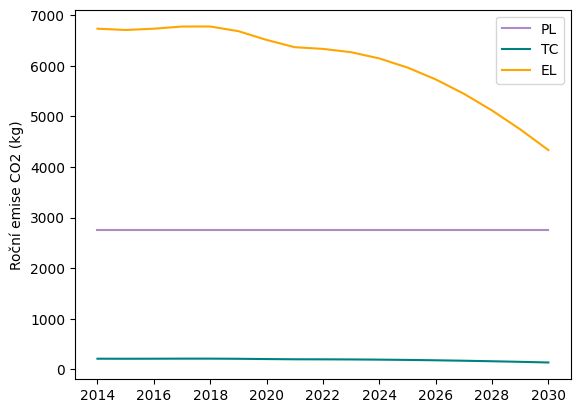

In [6]:
df_transposed = flat_80_sqm.transpose()

colors_dict = {
    "UH": "#a8786e",
    "PL": "#ad8bc9",
    "EL": "orange",
    "TC": "teal",
}

colors = [colors_dict[column] for column in df_transposed.columns]

df_transposed.plot(color=colors)
plt.ylabel("Roční emise CO2 (kg)")